In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [4]:
DATA_DIR = 'data'
TRAIN_FILEPATH = os.path.join(DATA_DIR, 'Datathon_train_data.csv')

In [5]:
data_raw = pd.read_csv(TRAIN_FILEPATH)

In [6]:
data_raw.shape

(64181, 11)

In [7]:
data_raw.columns = [column.lower().replace(' ', '_') for column in data_raw.columns]

In [11]:
data_raw.sample(10)

,id,car_type,fuel_type,make,model,odometer_reading,year_of_registration_date,pav,total_repair_cost,highest_bid_price,copart_get
26386,10555,Passenger_car,Diesel,Honda,accord,158890.0,2007.0,3950.0,2700.0,1710,0
28106,56026,Truck_transporter_bus,Diesel,Iveco,NaN,688622.0,2012.0,1.0,12845.0,6400,0
30825,56215,Other,Diesel,Audi,A6 Lim.,79482.0,2012.0,NaN,21263.0,9000,0
20156,17580,Passenger_car,Diesel,NaN,NaN,28707.0,1987.0,0.0,0.0,2000,0
49346,47702,Passenger_car,Gasoline,Ford,focus,177175.0,2011.0,7400.0,6899.0,3188,0
29156,48796,Passenger_car,Gasoline,Volkswagen,polo,126192.0,2011.0,6900.0,4867.0,4110,0
59538,69773,Passenger_car,Diesel,Volvo,C30,119859.0,2011.0,8800.0,5538.0,3300,0
44295,44524,Motorcycle,Gasoline,KTM,NaN,15000.0,2012.0,2600.0,10500.0,127,0
23110,62418,Passenger_car,Gasoline,Opel,Corsa,54882.0,2012.0,6500.0,2966.0,3122,0
2210,22821,Passenger_car,Diesel,Audi,a6,59472.0,2013.0,NaN,24052.0,14223,0


In [12]:
data_raw.dtypes

id                             int64
car_type                      object
fuel_type                     object
make                          object
model                         object
odometer_reading             float64
year_of_registration_date    float64
pav                          float64
total_repair_cost            float64
highest_bid_price              int64
copart_get                     int64
dtype: object

In [13]:
data_raw.describe()

,id,odometer_reading,year_of_registration_date,pav,total_repair_cost,highest_bid_price,copart_get
count,64181.000000,6.320000e+04,63955.000000,5.889400e+04,62299.000000,64181.000000,64181.000000
mean,45923.967732,1.742280e+10,2008.338832,9.541848e+03,9151.546879,3591.864882,0.050108
std,26469.905566,3.997622e+12,8.934258,7.865586e+04,14295.423908,4918.553523,0.218170
min,1.000000,0.000000e+00,1096.000000,-1.080000e+04,0.000000,11.000000,0.000000
25%,23086.000000,6.766100e+04,2005.000000,2.900000e+03,3171.000000,751.000000,0.000000
50%,45920.000000,1.247240e+05,2009.000000,5.900000e+03,5667.000000,2221.000000,0.000000
75%,68940.000000,1.856438e+05,2013.000000,1.100000e+04,10295.000000,4650.000000,0.000000
max,91685.000000,1.000000e+15,3013.000000,1.880040e+07,914519.000000,170100.000000,1.000000


In [14]:
#sns.sample(10000).pairplot(data)

In [15]:
#data_raw['odometer_reading'].hist()

# Huge Odometer

In [16]:
#data_raw.Make[data_raw.Make.isnull()] = 'kj'

In [17]:
data_raw.sort_values('odometer_reading', ascending=False).head(30)

,id,car_type,fuel_type,make,model,odometer_reading,year_of_registration_date,pav,total_repair_cost,highest_bid_price,copart_get
26668,55338,Passenger_car,unknown,NaN,NaN,1.000000e+15,2003.0,7500.0,14000.0,1011,0
14416,57981,Other,unknown,NaN,NaN,1.000000e+14,2011.0,9460.0,9300.0,4501,1
55845,24085,Other,unknown,NaN,NaN,1.000000e+12,2007.0,8270.0,5502.0,3490,0
7848,34223,Other,unknown,NaN,NaN,1.000000e+11,2007.0,35700.0,16657.0,8890,0
5152,83757,Other,unknown,NaN,NaN,1.010101e+10,2017.0,41650.0,49100.0,11100,0
17632,54168,Other,unknown,NaN,NaN,1.111111e+09,2014.0,14000.0,30000.0,3850,0
21577,43986,Other,unknown,NaN,NaN,1.000000e+09,2016.0,17600.0,7442.0,8010,0
46469,17445,Other,unknown,NaN,NaN,1.000000e+08,2013.0,12971.0,13958.0,2000,0
48721,22059,Other,NaN,NaN,NaN,1.000000e+08,1996.0,3750.0,3912.0,802,0
18330,7258,Passenger_car,Gasoline,Opel,corsa,9.793945e+07,2000.0,1900.0,6345.0,50,0


# Count of car types

In [18]:
car_type_counts = data_raw[['car_type']].groupby(['car_type']).apply(pd.Series.count)

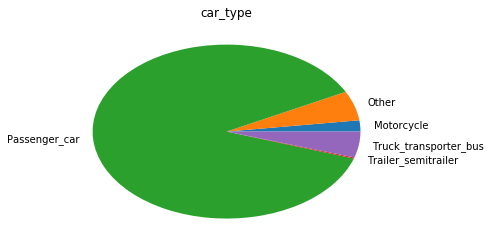

In [19]:
plt.pie(car_type_counts, labels=car_type_counts.index)
plt.title('car_type')
print('') # print to avoid the output from chart

In [20]:
median_odometer_by_car_type = data_raw[['odometer_reading', 'car_type']].groupby(['car_type']).median().reset_index()
median_odometer_by_car_type

,car_type,odometer_reading
0,Motorcycle,15897.0
1,Other,93314.5
2,Passenger_car,127314.0
3,Trailer_semitrailer,0.0
4,Truck_transporter_bus,161893.0


Text(0.5,1,'Odometer Reading by Car Type')

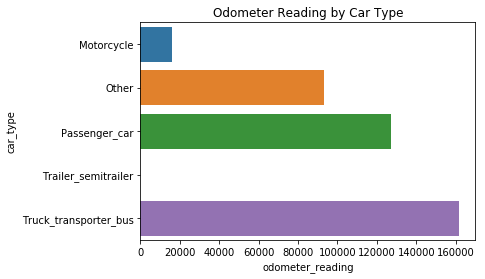

In [21]:
sns.barplot(x='odometer_reading', y='car_type', data=median_odometer_by_car_type) \
    .set_title('Odometer Reading by Car Type')

# Missing Values

In [22]:
data_raw.isnull().sum()

id                               0
car_type                         0
fuel_type                     1199
make                          2623
model                        25784
odometer_reading               981
year_of_registration_date      226
pav                           5287
total_repair_cost             1882
highest_bid_price                0
copart_get                       0
dtype: int64

In [23]:
null_make = data_raw[data_raw['make'].isnull()]
model_when_null_make = null_make[null_make['model'].notnull()]
print('all models are null when make is null')

all models are null when make is null


# Clean Data

In [24]:
data = data_raw.copy()

## Cleanup outliers on odometer

In [25]:
odometer_readings_greater_than_one_hundred_thousand = data_raw[data_raw['odometer_reading'] >= (100000000-1)]
len(odometer_readings_greater_than_one_hundred_thousand)

9

In [26]:
median_odometer_by_car_type

,car_type,odometer_reading
0,Motorcycle,15897.0
1,Other,93314.5
2,Passenger_car,127314.0
3,Trailer_semitrailer,0.0
4,Truck_transporter_bus,161893.0


### Drop Odomoter outliers (greater than one hundred thousand)

In [27]:
data = data.drop(odometer_readings_greater_than_one_hundred_thousand.index)
data.shape

(64172, 11)

### Impute other Odometer outliers (greater than one million)

In [28]:
odometer_readings_greater_than_one_million = data[data['odometer_reading'] >= (1000000-1)]
len(odometer_readings_greater_than_one_million)

73

In [29]:
odometer_readings_at_zero = data[data.odometer_reading == 0]
len(odometer_readings_at_zero)

548

In [30]:
odometer_readings_at_null = data[data.odometer_reading.isnull()]
len(odometer_readings_at_null)

981

In [31]:
weird_odometers = pd.concat([
    odometer_readings_at_zero,
    odometer_readings_greater_than_one_million,
    odometer_readings_at_null,
])
print(len(weird_odometers))

1602


In [32]:
# TODO: right now we are imputing based on car_type, we can go deeper and look at make and/or model too
for i in weird_odometers.index:
    car = weird_odometers.loc[i]
    median_value = median_odometer_by_car_type \
        [median_odometer_by_car_type['car_type'] == car.car_type].odometer_reading
    #car.odometer_reading = median_value.values[0]
    data.set_value(i, 'odometer_reading', median_value)

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [33]:
# We should now have no massive odometer readings
len(data[data['odometer_reading'] >= (1000000-1)])

0

In [34]:
# Trailers that actually have an odometer reading (pretty weird)
data.query("odometer_reading != 0 and car_type == 'Trailer_semitrailer'")

,id,car_type,fuel_type,make,model,odometer_reading,year_of_registration_date,pav,total_repair_cost,highest_bid_price,copart_get
5686,59054,Trailer_semitrailer,unknown,NaN,NaN,659389.0,2013.0,31892.0,20047.0,14120,0
15278,19909,Trailer_semitrailer,unknown,NaN,NaN,157181.0,2016.0,23800.0,19412.0,7000,0
21803,57928,Trailer_semitrailer,unknown,NaN,NaN,55555.0,2011.0,0.0,33333.0,265,0
21942,63997,Trailer_semitrailer,Gasoline,Daf,Other,238187.0,2017.0,77350.0,96674.0,10001,0
22381,54796,Trailer_semitrailer,unknown,NaN,NaN,301114.0,2015.0,74970.0,41957.0,26537,0
28318,49929,Trailer_semitrailer,unknown,NaN,NaN,1000.0,2016.0,750.0,2120.0,130,0
35589,61086,Trailer_semitrailer,unknown,Other,Other,796.0,2009.0,9300.0,8734.0,1200,0
48665,34231,Trailer_semitrailer,unknown,NaN,NaN,2500.0,2009.0,450.0,368.0,70,0


# Fix Makes

In [35]:
len(data.make.unique())

127

In [36]:
def fixString(myFix):
    if (not pd.isna(myFix)):
        return myFix.lower().strip()
fixedStrings = data[['make', 'model']].applymap(fixString)

In [37]:
mb = 'mercedes benz'
hd = 'harley-davidson'
pg = 'peugeot'
lr = 'land rover'
makeReplacementDict = {
    'mercedes-benz / maybach' : mb,
    'mercedes-benz'           : mb,
    'merceds benz'            : mb,
    'mercedes -benz'          : mb,
    'mercedes'                : mb,
    'merceded benz'           : mb, 
    'd mercedes-benz'         : mb,
    'mercedes benz'           : mb,
    
    'harley-david'    : hd,
    'harley davidson' : hd,
    'harley-davidson' : hd,
    
    'fiat / lancia' : 'fiat',
    
    'ford (eu)' : 'ford',
    
    'daimler'      : 'daimlerchrysler',
    'daimler-benz' : 'daimlerchrysler',
    
    'alfa' : 'alfa romeo',
    
    'chrysler / jeep' : 'jeep',
    
    'opel automobile' : 'opel',
    
    'peugeot'   : pg,
    'peugot'    : pg,
    
    'piaggio (gilera/vespa)' : 'piaggio',
    
    'rover'                    : lr,
    'land rover'               : lr,
    'mg / rover / mini (blmc)' : lr,
    
    'mini (bmw)' : 'mini',
    
    'kia motors' : 'kia',
    
    'ssang' : 'ssangyong',
}
fixedStrings.make.replace( to_replace = makeReplacementDict, inplace = True )


In [38]:
data['make'] = fixedStrings.make

In [39]:
len(data.make.unique())

103

# Fix Models

In [40]:
# Check how many models just show up once
len(data.model.value_counts()[data.model.value_counts() == 1])

417

In [41]:
# Check how many unique models exist
len(data.model.value_counts())

1523

In [42]:
# Set all models to lower case
data.model = data.model.apply(lambda model: '' if model is None else (str(model)).lower())

In [43]:
len(data.model.value_counts()[data.model.value_counts() == 1])

309

In [44]:
len(data.model.value_counts())

1159

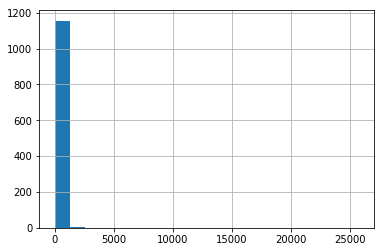

In [45]:
data.model.value_counts().hist(bins=20)

In [46]:
model_names_to_replace = {
    '-': ' ',
    '\.': '',
    "''": '',
    r'lim$': 'limited',
    r'limited$': '', # todo, this might need to be in another column
    'touring$': '', # todo, this might need to be in another column
    r'\s+': ' ',
    r'\+$': '',
    'klasse': 'class',
    '3er': '3rd',
    '4er': '4th',
    'p t ': 'pt ',
    'bmw': '',
    'vw': '',
    'mercedez': '',
    'mercedes': '',
    'benz': '',
    'renault': '',
    'nubira': '',
    'ford': '',
    'chevrolet': '',
    'jeep': '',
    'subaru': '',
    'mazda': '',
    'toyota': '',
    'jaguar': '',
    'kia': '',
    'nissan': '',
    'audi': '',
    'passat': '',
    'fiat': '',
}

In [47]:
def only_unique_words(model_name):
    model_name_split = model_name.split(' ')
    return ' '.join(list(set(model_name_split)))
only_unique_words('mondeo mondeo 20 ghia b4y')

'ghia mondeo b4y 20'

In [48]:
def replace_model_name(old_model_name):
    new_model_name = old_model_name.strip()
    for key, value in model_names_to_replace.items():
        new_model_name = re.sub(key, value, new_model_name)

    new_model_name = only_unique_words(new_model_name)

    return new_model_name.strip()
replace_model_name("honda honda-oddysey''")

'oddysey honda'

In [49]:
data.model = data.model.apply(replace_model_name)

In [50]:
len(data.model.value_counts())

1080

new field candidates:
 - touring
 - limited
 - kombi
 - +


weird ones:
 - k modelle (stra√üe)
 - 

In [51]:
data.model.value_counts()[-440:-400]

cinquecento                            3
r8                                     3
a2 1 4                                 3
s                                      3
allure                                 3
coupe/roadster                         3
& 16v twingo 12 n day night            3
xv                                     3
space wagon                            3
talento                                2
330d                                   2
gt 86                                  2
astra g                                2
peugeot 208                            2
19                                     2
eurocargo                              2
terracan                               2
180 c                                  2
vivaro kasten/combi                    2
smart forfour                          2
shuma                                  2
printer s                              2
sportback tdi multitronic dpf 30 a5    2
cabrio 3rd                             2
xc60 geartronic 

### Fix Year Registration Value


In [55]:
data.year_of_registration_date.unique()

array([2008., 2016., 2002., 2011., 2006., 2004., 1999., 2015., 1986.,
       2001., 2013., 2000., 2005., 2018., 1998., 2017., 2009., 1992.,
       2007., 2014., 2012., 2010., 2003., 1997., 1996., 1985., 1991.,
       1988., 1990., 1982., 1994., 1900., 1995.,   nan, 1984., 1950.,
       1979., 1983., 1987., 1989., 1901., 1980., 1993., 1981., 2019.,
       1975., 1974., 1972., 1976., 3013., 1096., 1965., 1969., 1978.,
       1977., 1963., 1973., 1968., 1959., 1964., 1967., 1961., 1958.,
       1970., 1960., 1952., 1971., 1953., 1949., 1956., 1966.])

In [56]:
data.loc[data.year_of_registration_date == 3013,'year_of_registration_date'] = 2013
data.loc[data.year_of_registration_date == 1096, 'year_of_registration_date'] = 1996

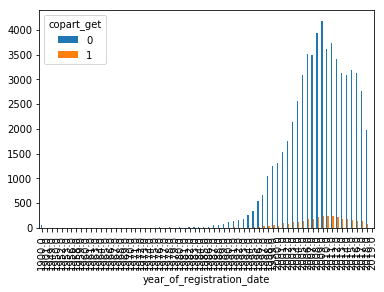

In [57]:
pd.crosstab(data.year_of_registration_date, data.copart_get).plot(kind='bar')

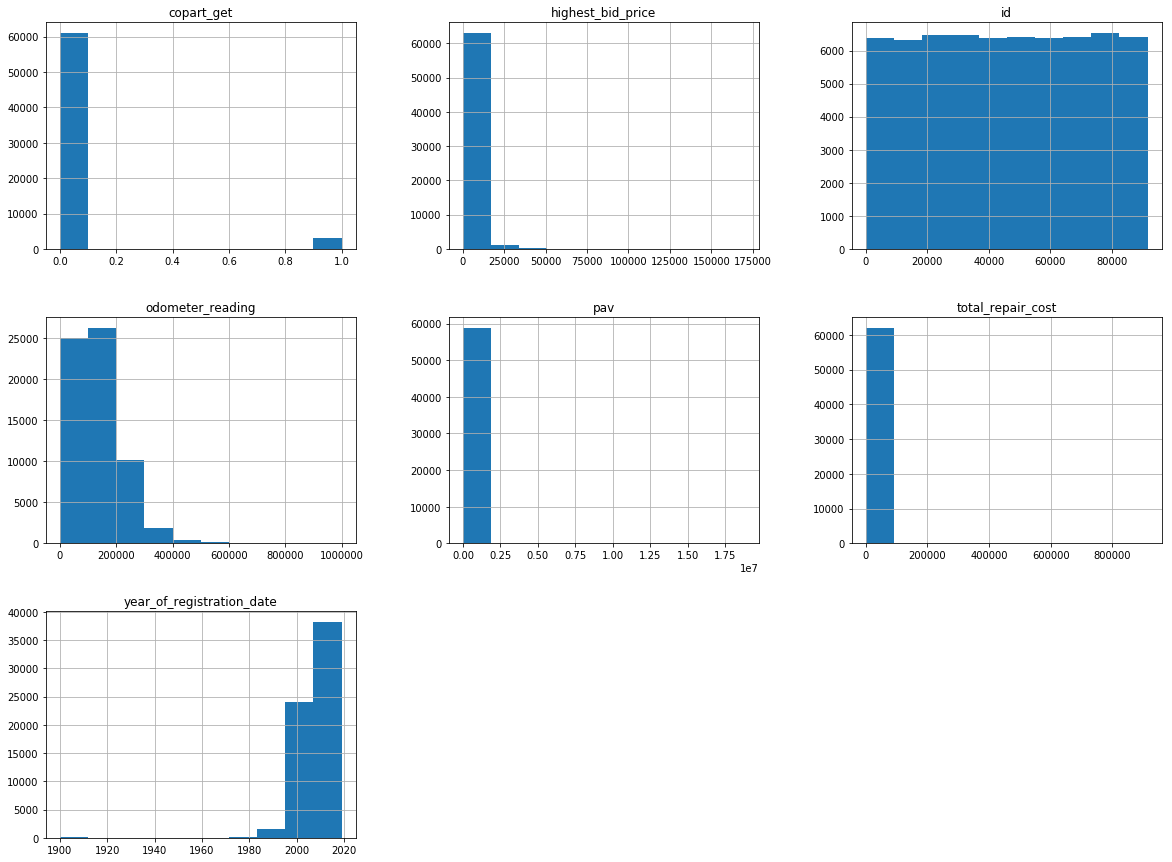

In [58]:
num_bins = 10
data.hist(bins=num_bins, figsize = (20,15))
plt.show()

## Creating dummy variables for categorical variables
There are four caegorical variables in the data set and they need to be converted to dummy variables before they can be used for modeling. 

In [59]:
data.isnull().sum()

id                              0
car_type                        0
fuel_type                    1198
make                         2614
model                           0
odometer_reading                0
year_of_registration_date     226
pav                          5287
total_repair_cost            1882
highest_bid_price               0
copart_get                      0
dtype: int64

In [52]:
data.head()

,id,car_type,fuel_type,make,model,odometer_reading,year_of_registration_date,pav,total_repair_cost,highest_bid_price,copart_get
0,42499,Passenger_car,Gasoline,bmw,318,175160.0,2008.0,7500.0,14756.0,1200,0
1,71617,Truck_transporter_bus,Diesel,renault,master iii,212480.0,2016.0,11500.0,5239.0,5555,0
2,40567,Passenger_car,Gasoline,fiat,panda,113229.0,2008.0,2000.0,7400.0,200,0
3,27245,Passenger_car,Gasoline,volkswagen,nan,202511.0,2002.0,500.0,1544.0,188,0
4,40418,Passenger_car,Gasoline,volkswagen,nan,74060.0,2011.0,4500.0,3438.0,1210,0


check unique values for each columns

In [54]:
def unique_count(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)
unique_count(data)

id :  64172
car_type :  5
fuel_type :  7
make :  102
model :  1080
odometer_reading :  54322
year_of_registration_date :  70
pav :  2623
total_repair_cost :  18569
highest_bid_price :  6691
copart_get :  2


In [63]:
cat_vars = ['car_type', 'fuel_type', 'make', 'model']
for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    df1 = data.join(cat_list)
    data = df1

In [64]:
cat_vars = data.columns.values.tolist()
y = 'copart_get'
X = [i for i in cat_vars if i not in y]

In [68]:
X[:10]

['id',
 'car_type',
 'fuel_type',
 'make',
 'model',
 'odometer_reading',
 'year_of_registration_date',
 'pav',
 'total_repair_cost',
 'highest_bid_price']